In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accident_coords_update.ipynb
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Areas.shp
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson
/kaggle/input/dataset-clean-unbalanced/Dataset_clean_unbalanced.csv


In [ ]:
#Objectif : mis en place d'un model prédictif sur la sévérité d'un accident

# donnée de sortie (Y) : Accident_Severity

# données sans intérêt : Accident_Index , Local_Authority_(District) , Local_Authority_(Highway) , 1st_Road_Number , Junction_Detail ,
#                        2nd_Road_Number , Year , Location_Easting_OSGR , Location_Northing_OSGR , Longitude , Latitude , 
#                        LSOA_of_Accident_Location

# données d'intérêt (X) : Police_Force , Number_of_Vehicles , Number_of_Casualties , Date , Day_of_Week , Time ,
#                         1st_Road_Class , Road_Type , Speed_limit , Pedestrian_Crossing-Human_Control , Pedestrian_Crossing-Physical_Facilities ,
#                         Light_Conditions , Weather_Conditions , Road_Surface_Conditions , Special_Conditions_at_Site , Carriageway_Hazards ,
#                         Urban_or_Rural_Area , Did_Police_Officer_Attend_Scene_of_Accident , Junction_Control

'''
TODO :  dataset déséquilivré, faire 1ère analyse pour comparer avant/après ré-équilibrage
'''

In [2]:
df1=pd.read_csv('/kaggle/input/dataset-clean-unbalanced/Dataset_clean_unbalanced.csv')
df1.drop(columns =['Unnamed: 0'], inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452458 entries, 0 to 1452457
Data columns (total 21 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Police_Force                                 1452458 non-null  int64  
 1   Number_of_Vehicles                           1452458 non-null  int64  
 2   Number_of_Casualties                         1452458 non-null  int64  
 3   Day_of_Week                                  1452458 non-null  int64  
 4   1st_Road_Class                               1452458 non-null  int64  
 5   Road_Type                                    1452458 non-null  int64  
 6   Speed_limit                                  1452458 non-null  int64  
 7   Junction_Control                             1452458 non-null  int64  
 8   2nd_Road_Class                               1452458 non-null  int64  
 9   Pedestrian_Crossing-Human_Control            1

In [3]:
saveDF = df1
saveDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452458 entries, 0 to 1452457
Data columns (total 21 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Police_Force                                 1452458 non-null  int64  
 1   Number_of_Vehicles                           1452458 non-null  int64  
 2   Number_of_Casualties                         1452458 non-null  int64  
 3   Day_of_Week                                  1452458 non-null  int64  
 4   1st_Road_Class                               1452458 non-null  int64  
 5   Road_Type                                    1452458 non-null  int64  
 6   Speed_limit                                  1452458 non-null  int64  
 7   Junction_Control                             1452458 non-null  int64  
 8   2nd_Road_Class                               1452458 non-null  int64  
 9   Pedestrian_Crossing-Human_Control            1

In [3]:
df1.drop(columns =['Police_Force'], inplace = True)
df1.drop(columns =['Heure'], inplace = True)
df1.drop(columns =['Mois'], inplace = True)
df1.drop(columns =['Day_of_Week'], inplace = True)
df1.drop(columns =['2nd_Road_Class'], inplace = True)
df1.drop(columns =['Pedestrian_Crossing-Human_Control'], inplace = True)
df1.drop(columns =['Pedestrian_Crossing-Physical_Facilities'], inplace = True)
df1.drop(columns =['Did_Police_Officer_Attend_Scene_of_Accident'], inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452458 entries, 0 to 1452457
Data columns (total 13 columns):
 #   Column                      Non-Null Count    Dtype
---  ------                      --------------    -----
 0   Number_of_Vehicles          1452458 non-null  int64
 1   Number_of_Casualties        1452458 non-null  int64
 2   1st_Road_Class              1452458 non-null  int64
 3   Road_Type                   1452458 non-null  int64
 4   Speed_limit                 1452458 non-null  int64
 5   Junction_Control            1452458 non-null  int64
 6   Light_Conditions            1452458 non-null  int64
 7   Weather_Conditions          1452458 non-null  int64
 8   Road_Surface_Conditions     1452458 non-null  int64
 9   Special_Conditions_at_Site  1452458 non-null  int64
 10  Carriageway_Hazards         1452458 non-null  int64
 11  Urban_or_Rural_Area         1452458 non-null  int64
 12  Severity                    1452458 non-null  int64
dtypes: int64(13)
memory usage: 

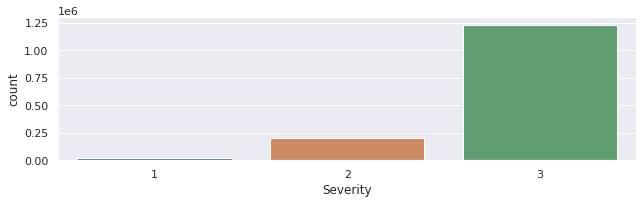

In [5]:
import seaborn as sns
sns.set()
sns.catplot(x='Severity', kind='count', data=df1, height=3, aspect=3)

In [4]:
import plotly.express as px

fig1 = px.histogram(df1, x='Severity')
fig1.show()

In [7]:
from sklearn.utils import resample

# Séparer le dataset en deux parties en fonction de la sévérité
df_severity_1 = df1[df1.Severity == 1]
df_severity_2 = df1[df1.Severity == 2]
df_severity_3 = df1[df1.Severity == 3]

# Sous-échantillonner les exemples de sévérité 3
df_severity_3_downsampled = resample(df_severity_3, replace=False, n_samples=len(df_severity_2), random_state=123)

# Sur-échantillonner les exemples de sévérité 1
df_severity_1_upsampled = resample(df_severity_1, replace=True, n_samples=len(df_severity_2), random_state=123)

# Concaténer les deux parties rééchantillonnées
df_balanced = pd.concat([df_severity_1_upsampled, df_severity_2, df_severity_3_downsampled])

# Mélanger les données
df_balanced = df_balanced.sample(frac=1, random_state=123).reset_index(drop=True)

# Afficher les proportions de chaque classe dans l'ensemble de données rééchantillonné
print(df_balanced.Severity.value_counts())


1    199039
2    199039
3    199039
Name: Severity, dtype: int64


In [8]:
df1 = df_balanced
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597117 entries, 0 to 597116
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Number_of_Vehicles          597117 non-null  int64
 1   Number_of_Casualties        597117 non-null  int64
 2   1st_Road_Class              597117 non-null  int64
 3   Road_Type                   597117 non-null  int64
 4   Speed_limit                 597117 non-null  int64
 5   Junction_Control            597117 non-null  int64
 6   Light_Conditions            597117 non-null  int64
 7   Weather_Conditions          597117 non-null  int64
 8   Road_Surface_Conditions     597117 non-null  int64
 9   Special_Conditions_at_Site  597117 non-null  int64
 10  Carriageway_Hazards         597117 non-null  int64
 11  Urban_or_Rural_Area         597117 non-null  int64
 12  Severity                    597117 non-null  int64
dtypes: int64(13)
memory usage: 59.2 MB


In [9]:
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
X = df1.loc[:, df1.columns!='Severity']
Y = df1['Severity']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [12]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier()
classifierKNN.fit(X_train, y_train)
y_predKNN = classifierKNN.predict(X_test)
#accuracy
accKNN = accuracy_score(y_test, y_predKNN)
print("accuracy_score =",accKNN)


accuracy_score = 0.49363612004287244


In [13]:
#confusion matrix
cmKNN = confusion_matrix(y_test, y_predKNN)
matrice_confKNN=pd.DataFrame(cmKNN,index=['1','2','3'],columns=['1','2','3'])
matrice_confKNN

,1,2,3
1,28293,8014,3627
2,13698,15663,10447
3,9972,14714,14996


In [14]:
#report
print(classification_report(y_test,y_predKNN))

              precision    recall  f1-score   support

           1       0.54      0.71      0.62     39934
           2       0.41      0.39      0.40     39808
           3       0.52      0.38      0.44     39682

    accuracy                           0.49    119424
   macro avg       0.49      0.49      0.48    119424
weighted avg       0.49      0.49      0.48    119424



In [15]:
#DT
from sklearn import tree
clfDT = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
clfDT = clfDT.fit(X_train, y_train)
y_predDT = clfDT.predict(X_test)
accDT=accuracy_score(y_test, y_predDT)
accDT

0.5464646972132905

In [16]:
cmDT = confusion_matrix(y_test, y_predDT)
matrice_confDT=pd.DataFrame(cmDT,index=['1','2','3'],columns=['1','2','3'])
matrice_confDT

,1,2,3
1,29345,5591,4998
2,11693,13342,14773
3,7143,9965,22574


In [17]:
print(classification_report(y_test,y_predDT))

              precision    recall  f1-score   support

           1       0.61      0.73      0.67     39934
           2       0.46      0.34      0.39     39808
           3       0.53      0.57      0.55     39682

    accuracy                           0.55    119424
   macro avg       0.53      0.55      0.53    119424
weighted avg       0.53      0.55      0.54    119424



In [18]:
#RF
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0) #n_estimators:nbr d'arbres(default=100)
rfc.fit(X_train, y_train)
rfc_pred_test = rfc.predict(X_test)
accRF=accuracy_score(y_test, rfc_pred_test)
accRF

0.5489181404072884

In [19]:
cmRF = confusion_matrix(y_test, rfc_pred_test)
matrice_confRF=pd.DataFrame(cmRF,index=['1','2','3'],columns=['1','2','3'])
matrice_confRF

,1,2,3
1,28949,5909,5076
2,11225,13400,15183
3,6788,9689,23205


In [20]:
print(classification_report(y_test,rfc_pred_test))

              precision    recall  f1-score   support

           1       0.62      0.72      0.67     39934
           2       0.46      0.34      0.39     39808
           3       0.53      0.58      0.56     39682

    accuracy                           0.55    119424
   macro avg       0.54      0.55      0.54    119424
weighted avg       0.54      0.55      0.54    119424

